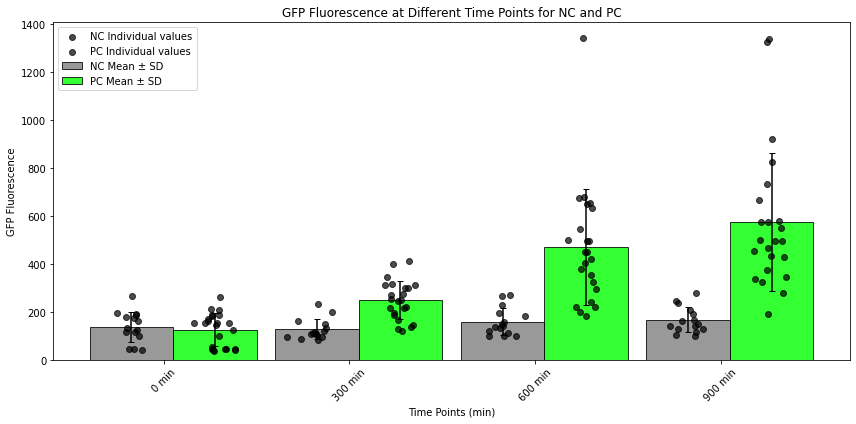

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define file names and the time points of interest
file_names = ["data_NC.xlsx", "data_PC.xlsx"]  # NC (Negative Control) and PC (Positive Control)
time_points = [0, 300, 600, 900]  # Time points in minutes
fluorophore = 'GFP'  # Change to 'TexRed' or 'GFP' as needed

# Define a function to extract data at the specified time points
def extract_data_at_time(file_name, time_points, fluorophore='GFP'):
    # Load the Excel file
    xls = pd.ExcelFile(file_name)
    
    # Dictionary to hold fluorescence data for each time point
    fluorescence_values = {tp: [] for tp in time_points}
    
    # Loop over each sheet
    for sheet_name in xls.sheet_names:
        # Read the sheet into a DataFrame
        df = xls.parse(sheet_name)
        
        # Loop over each time point
        for tp in time_points:
            # Filter the row at the specified time point
            row = df[df['Time [min]'] == tp]
            
            # If the row exists at this time point, extract fluorescence data for the selected fluorophore
            if not row.empty:
                fluor_columns = [col for col in df.columns if fluorophore in col]
                fluorescence_values[tp].extend(row[fluor_columns].values.flatten())  # Flatten to get values in a single list
    
    return fluorescence_values

# Extract data for both NC and PC at the specified time points
all_values_nc = extract_data_at_time(file_names[0], time_points, fluorophore)
all_values_pc = extract_data_at_time(file_names[1], time_points, fluorophore)

# Calculate means and standard deviations for NC and PC
means_nc = [np.mean(all_values_nc[tp]) for tp in time_points]
std_devs_nc = [np.std(all_values_nc[tp]) for tp in time_points]
means_pc = [np.mean(all_values_pc[tp]) for tp in time_points]
std_devs_pc = [np.std(all_values_pc[tp]) for tp in time_points]

# Plotting
plt.figure(figsize=(12, 6))


# Define positions for bars
x_positions_nc = np.arange(len(time_points))  # Positions for NC bars
x_positions_pc = x_positions_nc + 0.45  # Positions for PC bars, shifted by 0.35 for grouping

# Create bar plot for the means with standard deviation error bars for NC and PC
plt.bar(x_positions_nc, means_nc, yerr=std_devs_nc, capsize=3, alpha=0.8, label='NC Mean ± SD', color='gray', width=0.45, edgecolor='0')
plt.bar(x_positions_pc, means_pc, yerr=std_devs_pc, capsize=3, alpha=0.8, label='PC Mean ± SD', color='lime', width=0.45, edgecolor='0')

# Add scatter points for all individual values
for i, tp in enumerate(time_points):
    # Jittered scatter points for NC
    jittered_x_nc = np.full(len(all_values_nc[tp]), x_positions_nc[i]) + np.random.normal(0, 0.05, len(all_values_nc[tp]))
    plt.scatter(jittered_x_nc, all_values_nc[tp], color='black', edgecolor='black', alpha=0.7, zorder=2, label='NC Individual values' if i == 0 else "")
    
    # Jittered scatter points for PC
    jittered_x_pc = np.full(len(all_values_pc[tp]), x_positions_pc[i]) + np.random.normal(0, 0.05, len(all_values_pc[tp]))
    plt.scatter(jittered_x_pc, all_values_pc[tp], color='black', edgecolor='black', alpha=0.7, zorder=2, label='PC Individual values' if i == 0 else "")

# Plot details
plt.xlabel('Time Points (min)')
plt.ylabel(f'{fluorophore} Fluorescence')
plt.title(f'{fluorophore} Fluorescence at Different Time Points for NC and PC')
plt.xticks(x_positions_nc + 0.175, [f'{tp} min' for tp in time_points], rotation=45)  # Center the xticks between NC and PC bars
plt.legend()
plt.tight_layout()
#plt.savefig('Sybr.svg', format='svg') #Save the figure
plt.show()
